# Working with ````asammdf.MDF````

In [2]:
from asammdf import MDF, Signal
print(MDF.__doc__)

Unified access to MDF v3 and v4 files. Underlying _mdf's attributes and
    methods are linked to the `MDF` object via *setattr*. This is done to expose
    them to the user code and for performance considerations.

    Parameters
    ----------
    name : string | fsspec.core.OpenFile,
        mdf file name (if provided it must be a real file name) or
        fsspec.core.OpenFile object

    version : string
        mdf file version from ('2.00', '2.10', '2.14', '3.00', '3.10', '3.20',
        '3.30', '4.00', '4.10', '4.11', '4.20'); default '4.10'


    callback (\*\*kwargs) : function
        keyword only argument: function to call to update the progress; the
        function must accept two arguments (the current progress and maximum
        progress value)
    use_display_names (\*\*kwargs) : bool
        keyword only argument: for MDF4 files parse the XML channel comment to
        search for the display name; XML parsing is quite expensive so setting
        this to *False* can 

## Create 3 Signal objects

In [5]:
import numpy as np

In [6]:
timestamps = np.array([0.1, 0.2, 0.3, 0.4, 0.5], dtype=np.float32)

### unit8

In [7]:
s_uint8 = Signal(samples=np.array([0, 1, 2, 3, 4], dtype=np.uint8),
                 timestamps=timestamps,
                 name='Uint8_Signal',
                 unit='u1')

### int32

In [8]:
s_int32 = Signal(samples=np.array([-20, -10, 0, 10, 20], dtype=np.int32),
                 timestamps=timestamps,
                 name='Int32_Signal',
                 unit='i4')

### float64

In [9]:
s_float64 = Signal(samples=np.array([-20, -10, 0, 10, 20], dtype=np.float64),
                   timestamps=timestamps,
                   name='Float64_Signal',
                   unit='f8')

Create empty MDF version 4.00 file:

3.10
<Signal Float64_Signal:
	samples=[-20. -10.   0.  10.  20.]
	timestamps=[0.1        0.2        0.30000001 0.40000001 0.5       ]
	invalidation_bits=None
	unit=""
	conversion=None
	source=SignalSource(name='Created by Python', path='Created by Python', comment='Module number=0 @ address=0', source_type=0, bus_type=0)
	comment=""
	mastermeta="('time', 1)"
	raw=False
	display_name=
	attachment=()>



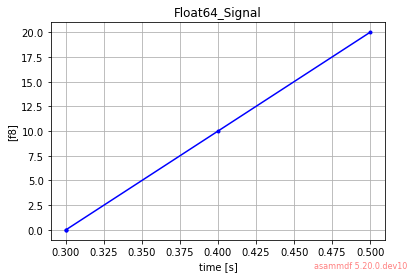

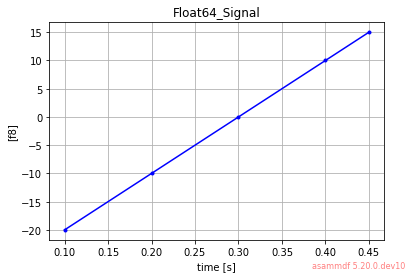

In [10]:
with MDF(version="4.10") as mdf4:

    # append the 3 signals to the new file
    signals = [s_uint8, s_int32, s_float64]
    mdf4.append(signals, "Created by Python")

    # save new file
    mdf4.save("my_new_file.mf4", overwrite=True)

    # convert new file to mdf version 3.10
    mdf3 = mdf4.convert(version="3.10")
    print(mdf3.version)

    # get the float signal
    sig = mdf3.get("Float64_Signal")
    print(sig)

    # cut measurement from 0.3s to end of measurement
    mdf4_cut = mdf4.cut(start=0.3)
    mdf4_cut.get("Float64_Signal").plot()

    # cut measurement from start of measurement to 0.4s
    mdf4_cut = mdf4.cut(stop=0.45)
    mdf4_cut.get("Float64_Signal").plot()

    # filter some signals from the file
    mdf4 = mdf4.filter(["Int32_Signal", "Uint8_Signal"])

    # save using zipped transpose deflate blocks
    mdf4.save("out.mf4", compression=2, overwrite=True)
